In [7]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

### Firstly, let's take a look at datasets in the Seaborn library 

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

##  Load an example dataset

In [9]:
tips = sns.load_dataset("tips")

In [10]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Let's look at the a concise summary of a dataset

In [11]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Let's look at the first and last few rows  to understand dataset

In [12]:
tips.head()  # Return the first `n` rows and default 5

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.tail()  # Return the last `n` rows and default 5

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## How many weekdays are present in the dataset?

In [15]:
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [16]:
tips["day"].nunique()

4

## How many dinners and lunches are present in the dataset?

In [17]:
tips["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Let's plot the chart of these values

In [130]:
# tips.plot()  # Make plots of Series or DataFrame.

<AxesSubplot:>

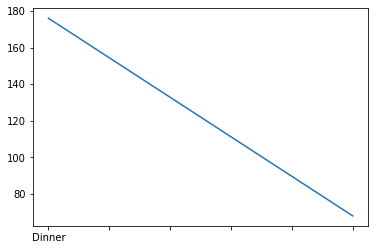

In [15]:
tips["time"].value_counts().plot()  # kind = line plot (default)

## This chart doesn't make sense, so let's change this to bar chart

<AxesSubplot:>

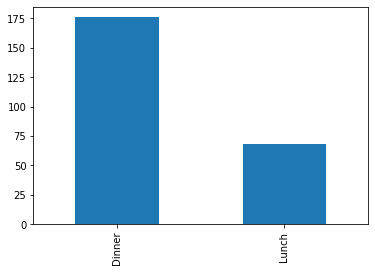

In [131]:
tips["time"].value_counts().plot(kind = "bar")

## What is the proportion of the dinner and lunches in %?

In [133]:
tips["time"].value_counts(normalize = True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

## Let's also take a look at the pie chart

array([<AxesSubplot:ylabel='time'>], dtype=object)

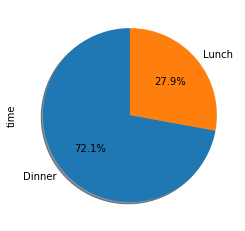

In [134]:
tips["time"].value_counts().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(4,4), autopct='%1.1f%%')

## When does people pay more tips i.e. during lunch or dinner?

In [47]:
tips.groupby(["time"])[["tip"]].mean()

,tip
time,
Lunch,2.728088
Dinner,3.102670


In [135]:
tips.groupby(["time"])["tip"].max()

time
Lunch      6.7
Dinner    10.0
Name: tip, dtype: float64

In [137]:
tips.groupby(["time"])["tip"].min()

time
Lunch     1.25
Dinner    1.00
Name: tip, dtype: float64

### The desired values are also found as follows:

In [144]:
tips[tips["time"] == "Dinner"]["tip"].mean()

3.102670454545454

In [145]:
tips[tips["time"] == "Lunch"]["tip"].mean()

2.728088235294118

## Let's plot these values

<AxesSubplot:xlabel='time'>

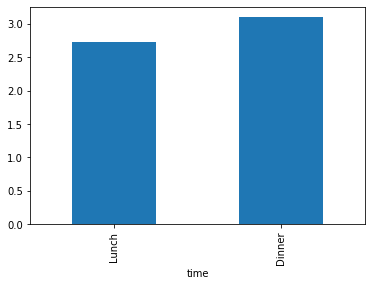

In [148]:
# tips.groupby(["time"])["tip"].mean().plot(kind = "bar")
tips.groupby(["time"])["tip"].mean().plot.bar()

## Let's generate descriptive statistics
The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [146]:
tips.groupby(["time"])[["tip"]].describe()

tip                                                   
        count      mean       std   min  25%   50%     75%   max
time                                                            
Lunch    68.0  2.728088  1.205345  1.25  2.0  2.25  3.2875   6.7
Dinner  176.0  3.102670  1.436243  1.00  2.0  3.00  3.6875  10.0

## Similarly we can find for average tips that it is different for
1. Smoker/Non Smoker
2. Sex
3. Day
4. Size

In [53]:
tips.groupby(["smoker"])["tip"].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [54]:
tips.groupby(["sex"])["tip"].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [55]:
tips.groupby(["day"])["tip"].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [56]:
tips.groupby(["size"])["tip"].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

## Let's create a cross table for Smoker/Sex and Tip for average tips

In [18]:
tips.groupby(["smoker","sex"])[["tip"]].mean()

tip
smoker sex             
Yes    Male    3.051167
       Female  2.931515
No     Male    3.113402
       Female  2.773519

## Let's put it more like a pivot structure

In [42]:
tips.groupby(["smoker","sex"])[["tip"]].mean().unstack()

tip          
sex         Male    Female
smoker                    
Yes     3.051167  2.931515
No      3.113402  2.773519

## Let's create a cross table for Sex and Day for average tips

In [58]:
tips.groupby(["day","sex"])["tip"].mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

In [62]:
tips.groupby(["sex","day"])["tip"].mean()  # that makes more sense.

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

## Let's look at dataframe with more detailed information about tip by sex and day

In [61]:
tips.groupby(["sex","day"])["tip"].describe().T

sex         Male                                      Female            \
day         Thur        Fri        Sat        Sun       Thur       Fri   
count  30.000000  10.000000  59.000000  58.000000  32.000000  9.000000   
mean    2.980333   2.693000   3.083898   3.220345   2.575625  2.781111   
std     1.353734   1.136428   1.791360   1.271172   1.109286  0.938862   
min     1.440000   1.500000   1.000000   1.320000   1.250000  1.000000   
25%     2.000000   1.665000   2.000000   2.000000   1.822500  2.500000   
50%     2.530000   2.600000   3.000000   3.085000   2.005000  3.000000   
75%     4.000000   3.375000   3.400000   3.980000   3.057500  3.250000   
max     6.700000   4.730000  10.000000   6.500000   5.170000  4.300000   

sex                          
day          Sat        Sun  
count  28.000000  18.000000  
mean    2.801786   3.367222  
std     1.234480   1.136775  
min     1.000000   1.010000  
25%     2.150000   2.707500  
50%     2.625000   3.500000  
75%     3.102500   3.937500  
max     6.500000   5.200000

## Let's plot bar chart that displays the mean of tip by days and sex

<AxesSubplot:xlabel='sex,day'>

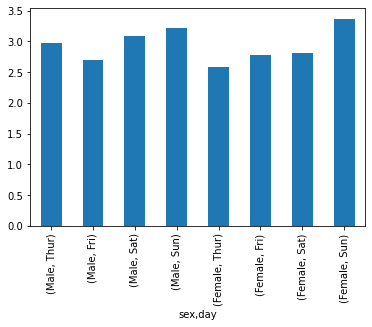

In [63]:
tips.groupby(["sex","day"])["tip"].mean().plot.bar()

## Let's create a cross table for Day and Size for average tips

In [64]:
tips.groupby(["day","size"])[["tip"]].mean()

tip
day  size          
Thur 1     1.830000
     2     2.442500
     3     2.692500
     4     4.218000
     5     5.000000
     6     5.300000
Fri  1     1.920000
     2     2.644375
     3     3.000000
     4     4.730000
     5          NaN
     6          NaN
Sat  1     1.000000
     2     2.517547
     3     3.797778
     4     4.123846
     5     3.000000
     6          NaN
Sun  1          NaN
     2     2.816923
     3     3.120667
     4     4.087778
     5     4.046667
     6     5.000000

In [59]:
(tips.groupby(["day","size"])[["tip"]].mean()).dropna()  # drop NAN values.

tip
day  size          
Thur 1     1.830000
     2     2.442500
     3     2.692500
     4     4.218000
     5     5.000000
     6     5.300000
Fri  1     1.920000
     2     2.644375
     3     3.000000
     4     4.730000
Sat  1     1.000000
     2     2.517547
     3     3.797778
     4     4.123846
     5     3.000000
Sun  2     2.816923
     3     3.120667
     4     4.087778
     5     4.046667
     6     5.000000

## Now let's create a new column to find out the % of tip compare to total bill

In [66]:
tips["tip_perc"] = tips.tip / tips.total_bill

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## Let's visualize the relationship between total bill and tips

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

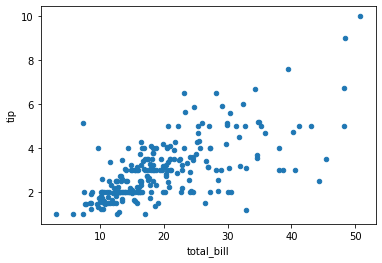

In [71]:
tips.plot(kind="scatter", x = "total_bill", y="tip")

## Visualizing this time using sns library
### Let's see the visualization by Time

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

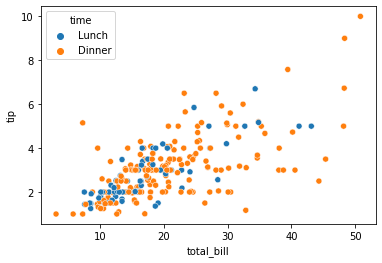

In [72]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

> The relationship between totall bill and tip can be shown as above. There is a linear, almost strong correlation between two variables. This scatter chart clearly tells us that when the total bill is increasing the tip is increasing. We see that there is a lot of tip, especially at dinner. 

```hue```: Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

### Let's see the total bill and tip distribution by sex

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

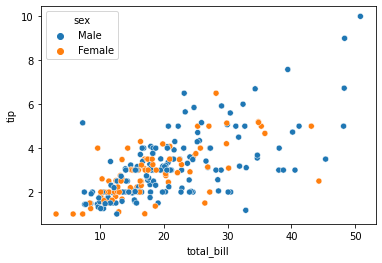

In [73]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")

> This scatter chart clearly tells us that men tip more than women and that the outliers belong to men.

### Creating the bifurcation of time on the chart above based on column sex

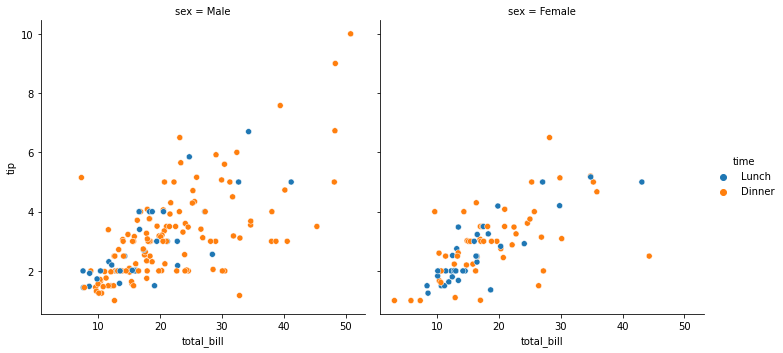

In [19]:
sns.relplot(x = "total_bill", y = "tip", data = tips, col = "sex", hue = "time")

In [27]:
tips["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [31]:
tips.groupby(["sex", "time"])[["total_bill","tip"]].count()

total_bill  tip
sex    time                   
Male   Lunch           33   33
       Dinner         124  124
Female Lunch           35   35
       Dinner          52   52

<AxesSubplot:xlabel='sex,time'>

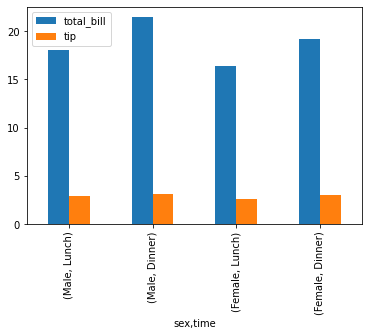

In [33]:
tips.groupby(["sex", "time"])[["total_bill","tip"]].mean().plot.bar()

> The graphs and analyzes above show that while men have a majority at dinner, women have a closer distribution at lunch and dinner.

## Using relplot() to see the distribution of total bill and tip of lunch and dinner by day  

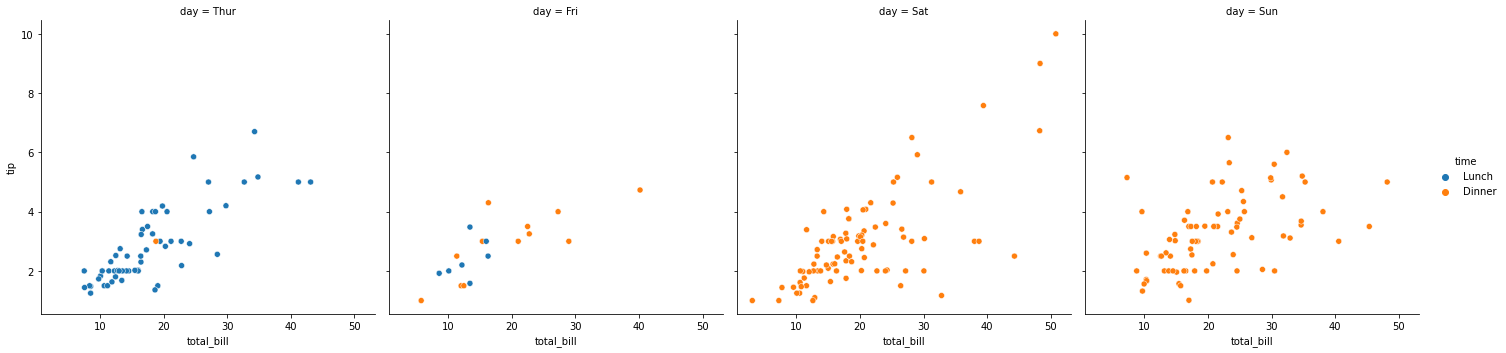

In [160]:
sns.relplot(x = "total_bill", y = "tip", data = tips, col = "day", hue = "time")

## Let's take a look at the descriptive statistics of total bill and tip by day

In [69]:
tips.groupby("day")[["total_bill","tip"]].describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip                                                          
     count      mean       std   min     25%    50%     75%    max  
day                                                                 
Thur  62.0  2.771452  1.240223  1.25  2.0000  2.305  3.3625   6.70  
Fri   19.0  2.734737  1.019577  1.00  1.9600  3.000  3.3650   4.73  
Sat   87.0  2.993103  1.631014  1.00  2.0000  2.750  3.3700  10.00  
Sun   76.0  3.255132  1.234880  1.01  2.0375  3.150  4.0000   6.50

### Let's look at the distribution of total bill by time

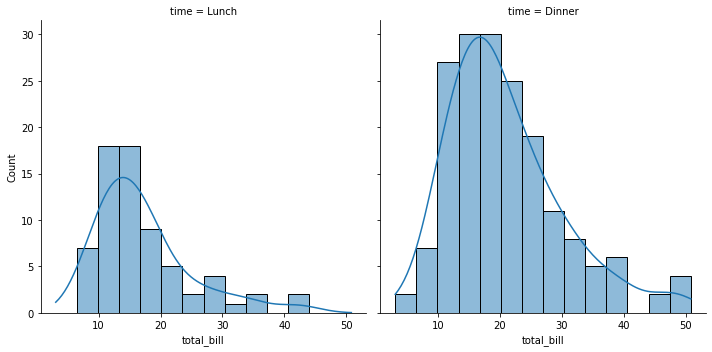

In [162]:
sns.displot(x = "total_bill", data = tips, col = "time", kde = True)

> Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function **```displot()```** supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

> These graphs clearly show that more customers are billed for dinner than lunch, and that shows more customers coming in for dinner. Lunch bills are around 17 while Dinner bills are mostly around 20's. 


- The following dataframe gives the numerical representation of these graphs.

In [163]:
tips.groupby(["time"])[["total_bill"]].describe()

total_bill                                                            
            count       mean       std   min      25%     50%      75%    max
time                                                                         
Lunch        68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11
Dinner      176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81

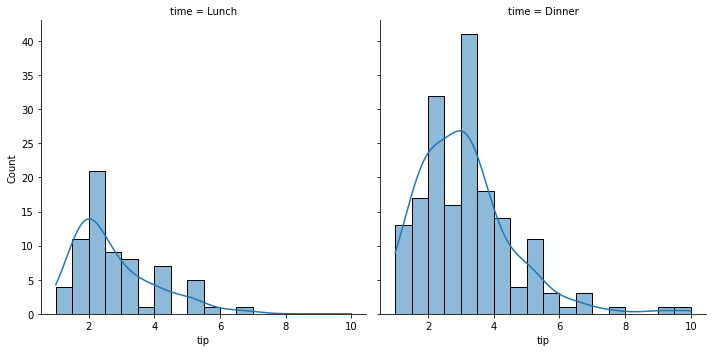

In [164]:
sns.displot(x = "tip", data = tips, col = "time", kde = True)  # Figure-level interface for drawing distribution plots onto a FacetGrid.

## Creating corellation and distribution for all the numeric variables by sex

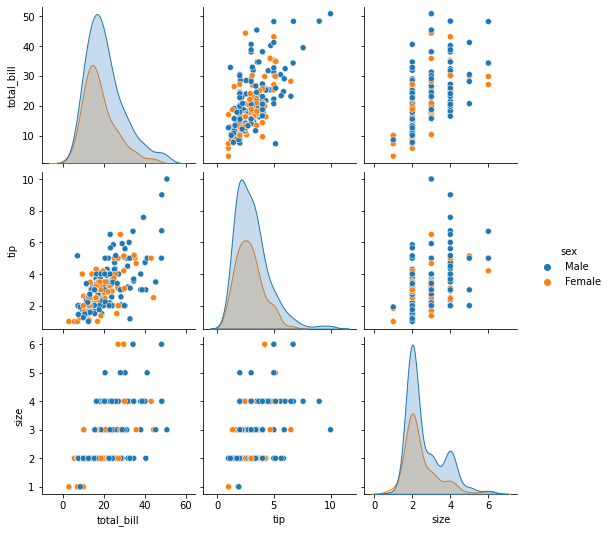

In [165]:
sns.pairplot(data = tips,hue="sex")  # Plot pairwise relationships in a dataset.

>By default, this function will create a grid of Axes such that each numeric variable in ``data`` will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.


> Pairplot:
It represents pairwise relation across the entire dataframe and supports an additional argument called hue for categorical separation. What it does basically is create a jointplot between every possible numerical column and takes a while if the dataframe is really huge.